In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit, dual_annealing
from scipy.special import voigt_profile
from scipy.signal import savgol_filter
from scipy.optimize import dual_annealing

figsize=(12, 6)
fontsize=14

### Зависимость интенсивности от положения щели

__Методика измерений:__

- на экране осциллографа были совмещены пики сигналов от насыщенной спектроскопии и пучка атомов


- лазер выкручен на полную катушку, считается, что все атомы насытились -> пересчет в количество атомов как $1/2$


- коэффициент поглощения стекла составляет несколько процентов, и не учитывается 


- ФЭУ откалиброван как 20В $\leftrightarrow$ 5.7нВт


- атомы летят в телесный угол $\Omega = 2\pi r h \rightarrow k = \dfrac{h}{2r} \simeq 0.0015$


- конечная формула $N = \dfrac{2I}{k h\nu}$

#### На примере MM70

##### Предобработка: обрезание, сглаживание, исключение постоянного сигнала

16305


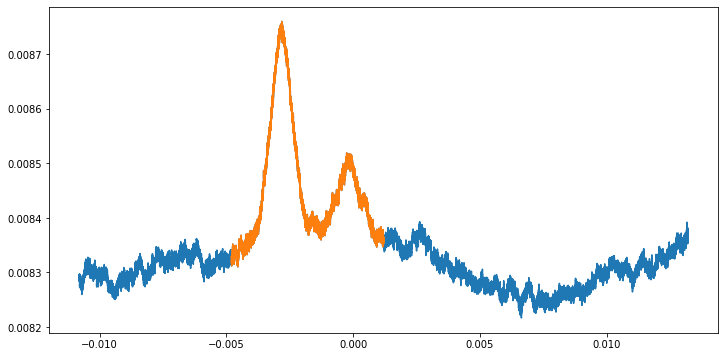

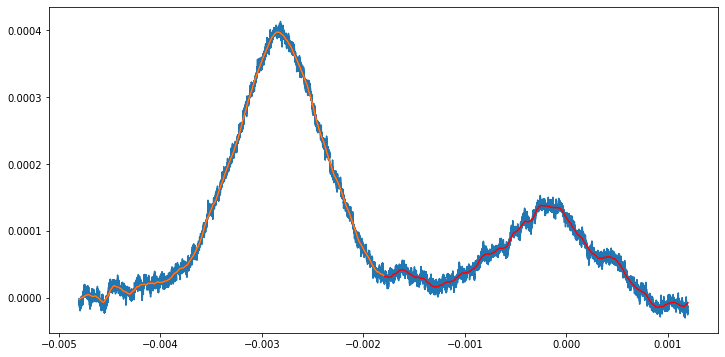

In [2]:
data = pd.read_csv("data/new_data/MM70.CSV")
x, y = np.array(data.iloc[::, 0]), np.array(data.iloc[::, 3])
plt.figure(figsize=figsize)
plt.plot(x, y)

a, b = len(x)//4, len(x)//2
plt.plot(x[a:b], y[a:b])

k, d = np.polyfit(x[:a], y[:a], deg=1)
x, y = x[a:b], y[a:b] - k*x[a:b] - d


plt.figure(figsize=figsize)
plt.plot(x, y)

kernel_size = 500
kernel = np.ones(kernel_size) / kernel_size
y = np.convolve(y, kernel, mode='same')

plt.plot(x, y, color="red")
plt.plot(x[:len(x)//2], y[:len(x)//2])
print(len(x)//2)

#### Обработка: поиск максимумов пиков, масштабирование

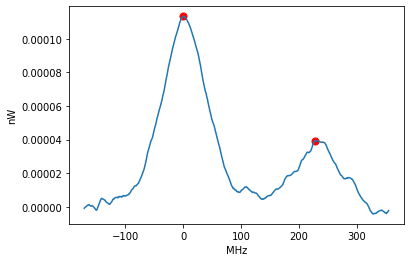

In [3]:
idx1, idx2 = np.argmax(y[:len(x)//2]), np.argmax(y[len(x)//2:]) + len(x)//2

m1, m2 = x[idx1], x[idx2]

x = (x - m1) * 228.2 / (m2 - m1)
y *= 5.7/20

plt.scatter([x[idx1], x[idx2]], [y[idx1], y[idx2]], color="red", s=50)
plt.plot(x, y)
plt.xlabel("MHz")
plt.ylabel("nW")



cord = [] #in mm
I1 = [] #in nW
I2 = [] #in nW
X = []
Y = []

In [4]:
def process(n, preleft=None, left=None, right=None, cut=None):
    data = pd.read_csv("data/new_data/MM{}.CSV".format(n))
    x, y = np.array(data.iloc[::, 0]), np.array(data.iloc[::, 3])
    plt.figure(figsize=figsize)
    plt.plot(x, y)

    if left == None or right == None:
        a, b = len(x)//4, len(x)//2
    else:
        a, b = left, right
        
        
    if left == None:
        a = len(x)//4
    else:
        a = left
    if right == None:
        b = len(x)//2
    else:
        b = right
        
        
    
    plt.plot(x[a:b], y[a:b])
    
    if preleft == None:
        k, d = np.polyfit(x[:a], y[:a], deg=1)
        x, y = x[a:b], y[a:b] - k*x[a:b] - d
        
    else:
        plt.plot(x[:preleft], y[:preleft], color="red")
        k, d = np.polyfit(x[preleft:a], y[preleft:a], deg=1)
        x, y = x[a:b], y[a:b] - k*x[a:b] - d
    
    
    
    plt.figure(figsize=figsize)

    kernel_size = 500
    kernel = np.ones(kernel_size) / kernel_size
    y = np.convolve(y, kernel, mode='same')
    

    if cut==None:
        idx1, idx2 = np.argmax(y[:len(x)//2]), np.argmax(y[len(x)//2:]) + len(x)//2
    else:
        idx1, idx2 = np.argmax(y[:cut]), np.argmax(y[cut:]) + cut
        
    m1, m2 = x[idx1], x[idx2]

    x = (x - m1) * 228.2 / (m2 - m1)
    y *= 5.7/20 / 0.012

    plt.plot(x, y)
    plt.xlabel("MHz")
    plt.ylabel("nW")
    
    return x, y, idx1, idx2

###### MM69.csv

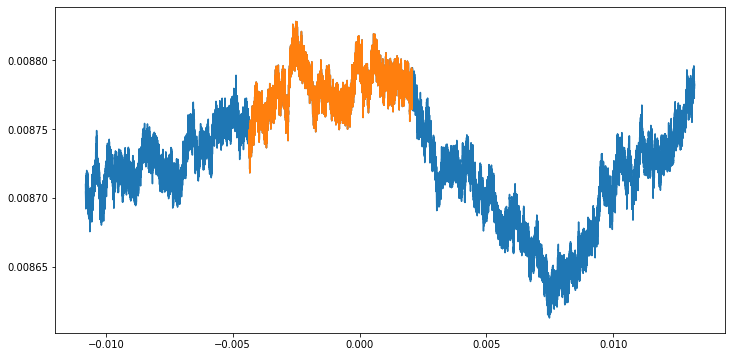

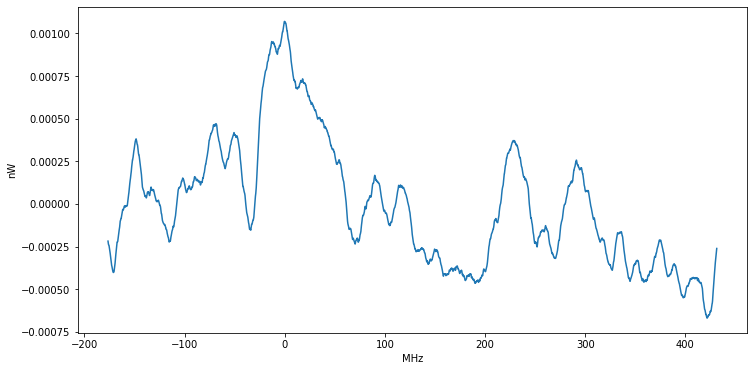

In [5]:
x, y, idx1, idx2 = process(69, left = 35000, right=70000)

I1.append(idx1)
I2.append(idx2)
X.append(x)
Y.append(y)

###### MM70.csv

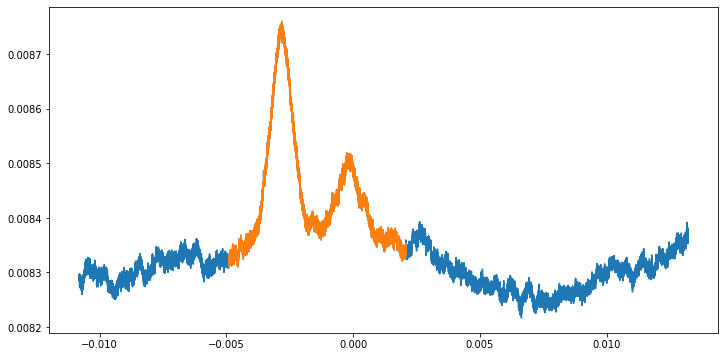

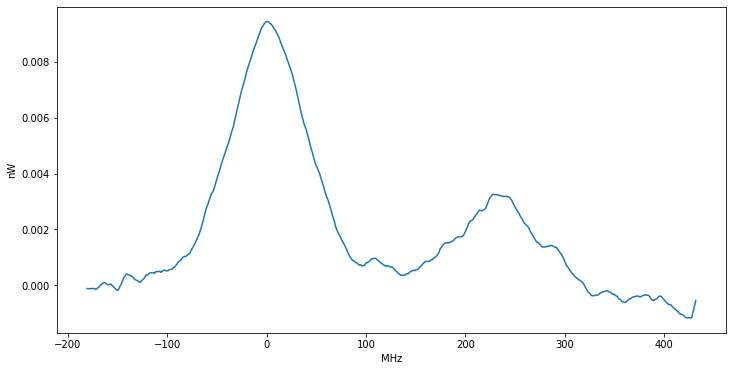

In [6]:
x, y, idx1, idx2 = process(70, left = 32000, right=70000)

I1.append(idx1)
I2.append(idx2)
X.append(x)
Y.append(y)

##### MM71.csv

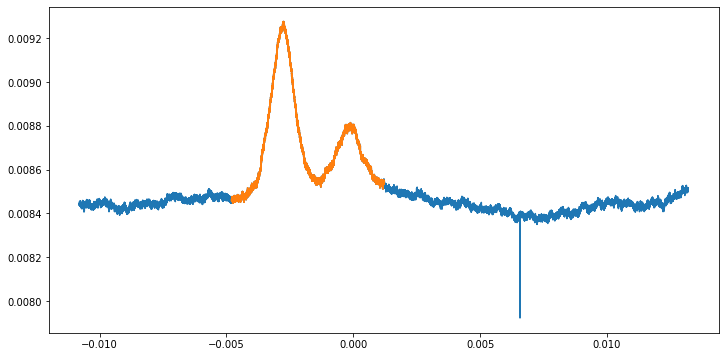

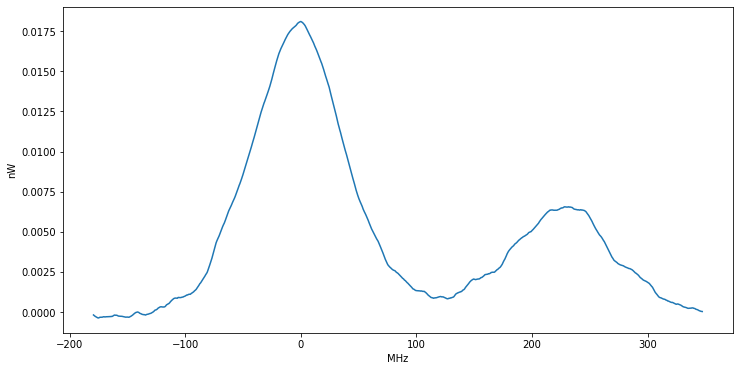

In [7]:
x, y, idx1, idx2 = process(71)

I1.append(idx1)
I2.append(idx2)
X.append(x)
Y.append(y)

##### MM72.csv

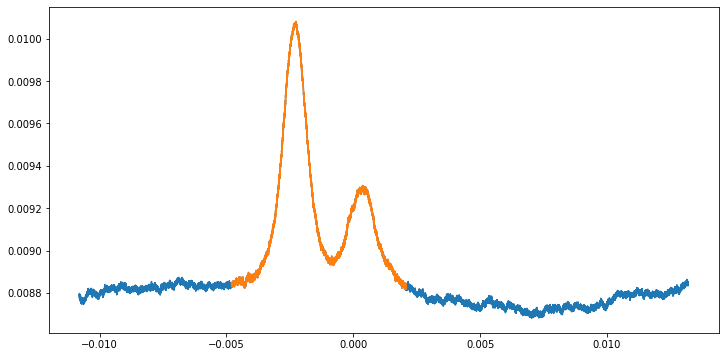

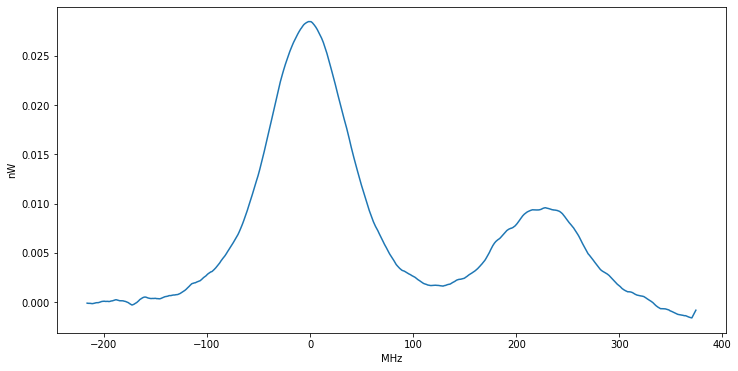

In [8]:
x, y, idx1, idx2 = process(72, right=70000)

I1.append(idx1)
I2.append(idx2)
X.append(x)
Y.append(y)

##### MM73.csv

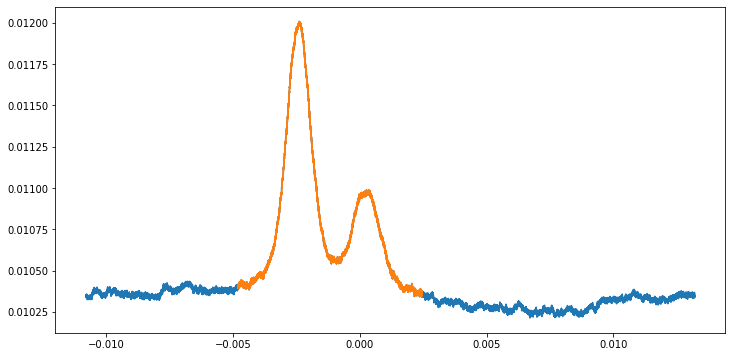

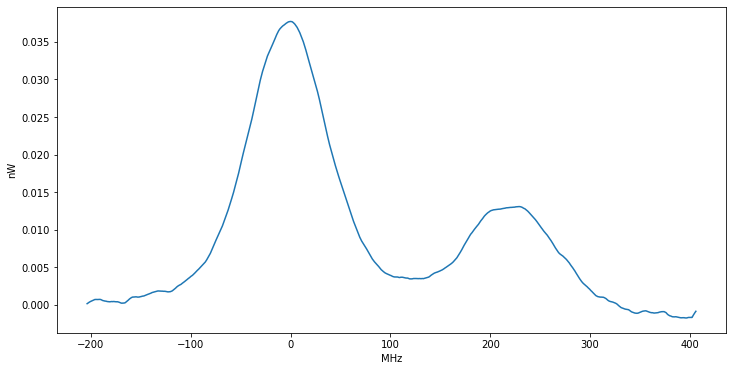

In [9]:
x, y, idx1, idx2 = process(73, right=72000)

I1.append(idx1)
I2.append(idx2)
X.append(x)
Y.append(y)

##### MM74.csv

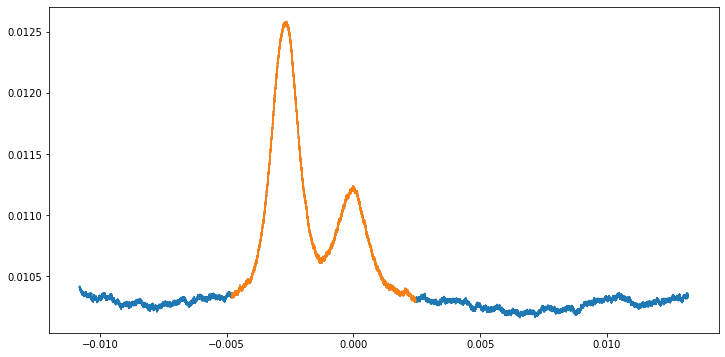

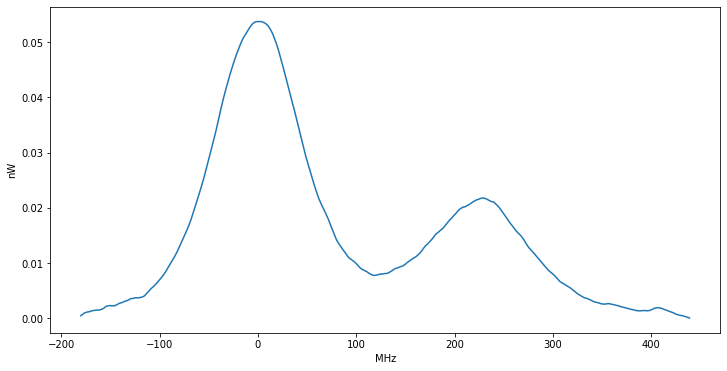

In [10]:
x, y, idx1, idx2 = process(74, right=72000)

I1.append(idx1)
I2.append(idx2)
X.append(x)
Y.append(y)

##### MM75.csv

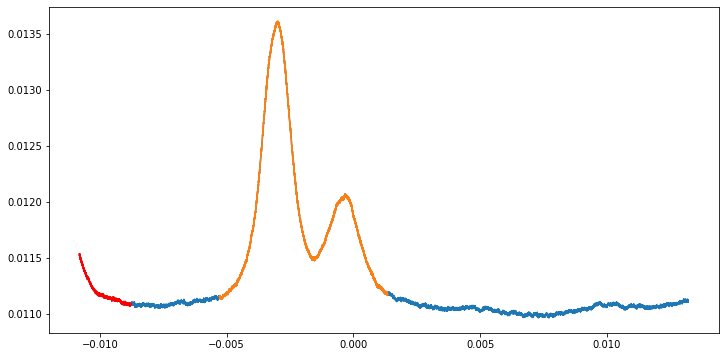

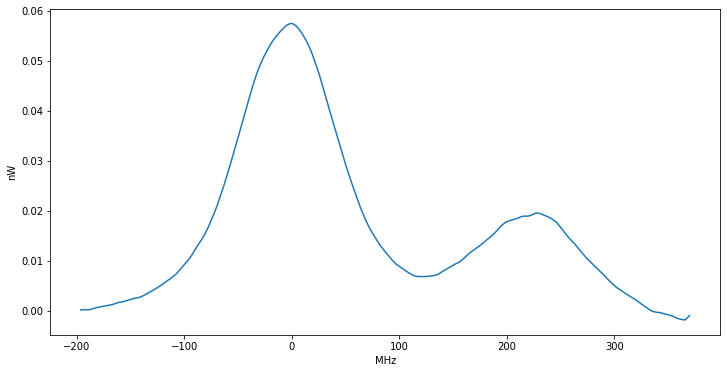

In [11]:
x, y, idx1, idx2 = process(75, preleft=11000, left = 30000, right=66000)

I1.append(idx1)
I2.append(idx2)
X.append(x)
Y.append(y)

###### MM76.csv

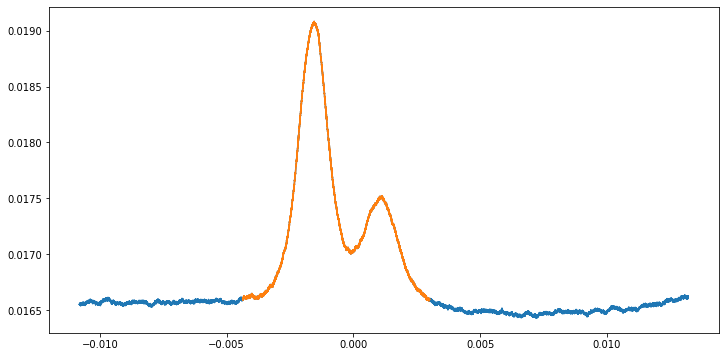

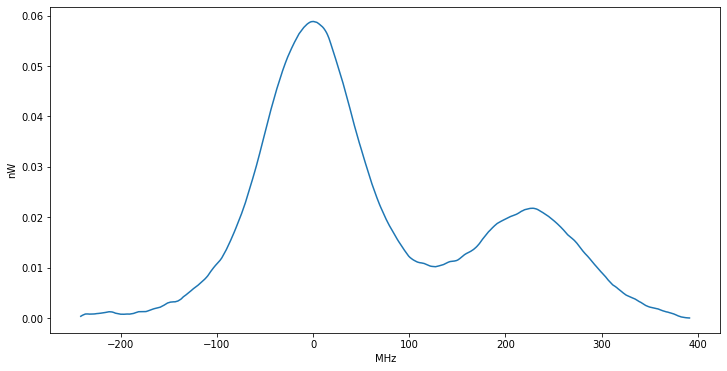

In [12]:
x, y, idx1, idx2 = process(76, left = 35000, right=75000)

I1.append(idx1)
I2.append(idx2)
X.append(x)
Y.append(y)

###### MM77.csv

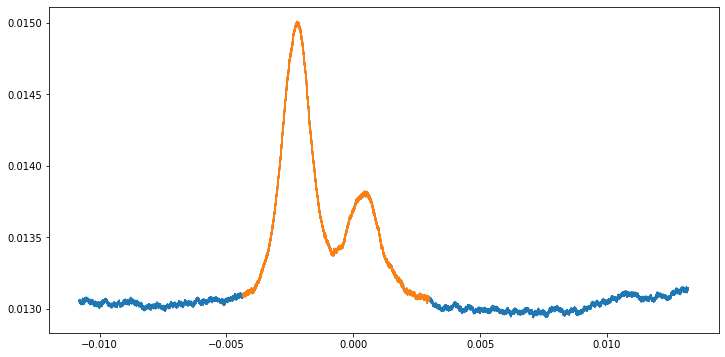

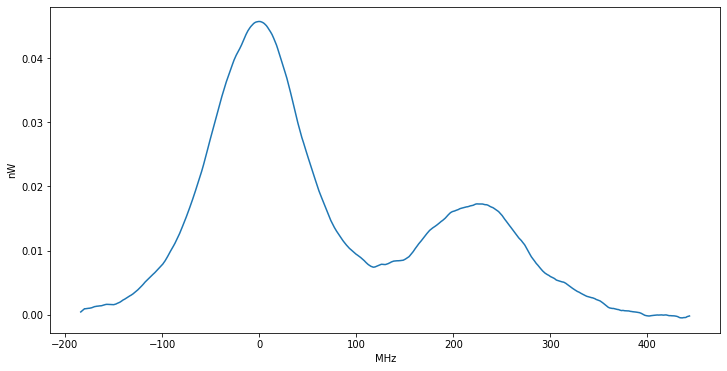

In [13]:
x, y, idx1, idx2 = process(77, left = 35000, right=75000)

I1.append(idx1)
I2.append(idx2)
X.append(x)
Y.append(y)

###### MM78.csv

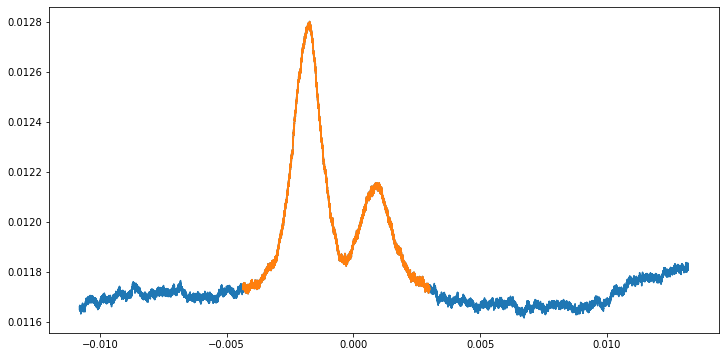

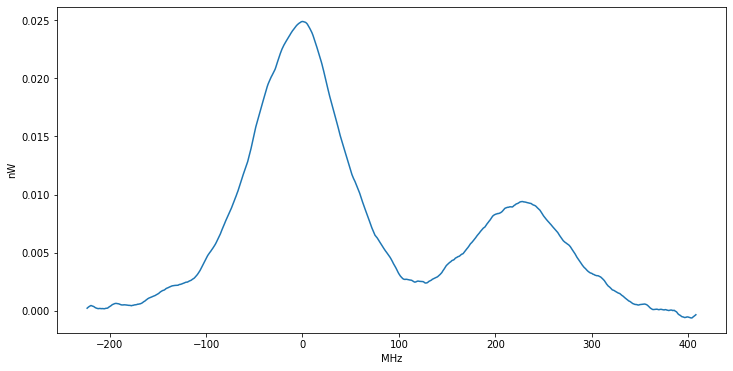

In [14]:
x, y, idx1, idx2 = process(78, left = 35000, right=75000)

I1.append(idx1)
I2.append(idx2)
X.append(x)
Y.append(y)

###### MM79.csv

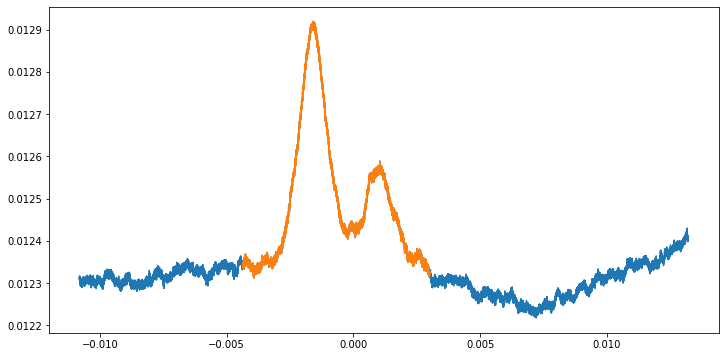

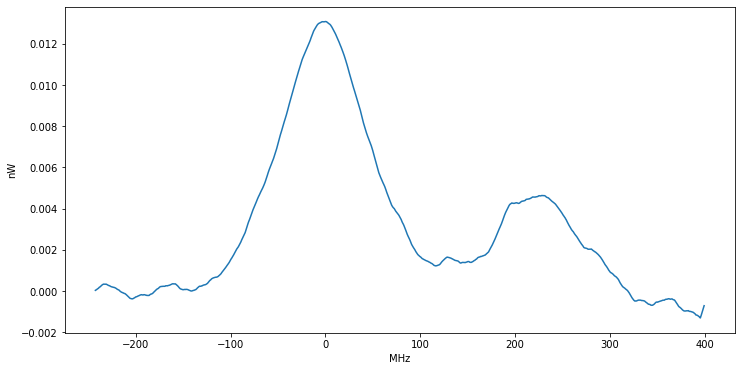

In [15]:
x, y, idx1, idx2 = process(79, left = 35000, right=75000)

I1.append(idx1)
I2.append(idx2)
X.append(x)
Y.append(y)

###### MM80.csv

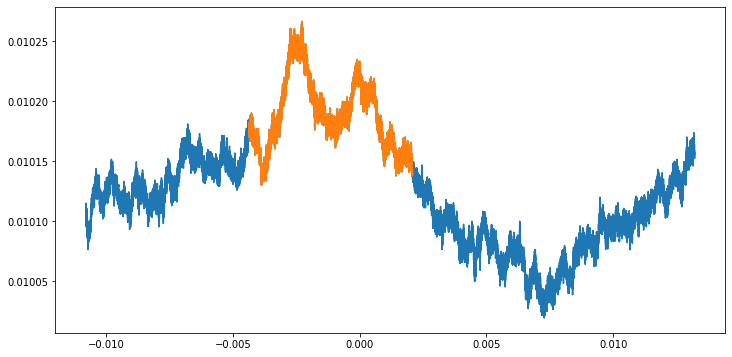

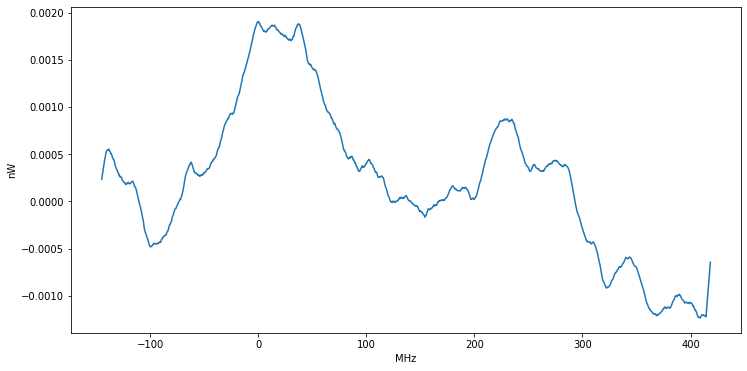

In [16]:
x, y, idx1, idx2 = process(80, left = 35000, right=70000)

I1.append(idx1)
I2.append(idx2)
X.append(x)
Y.append(y)

##### Сигналы от разных координат щели

0.3505190783050208


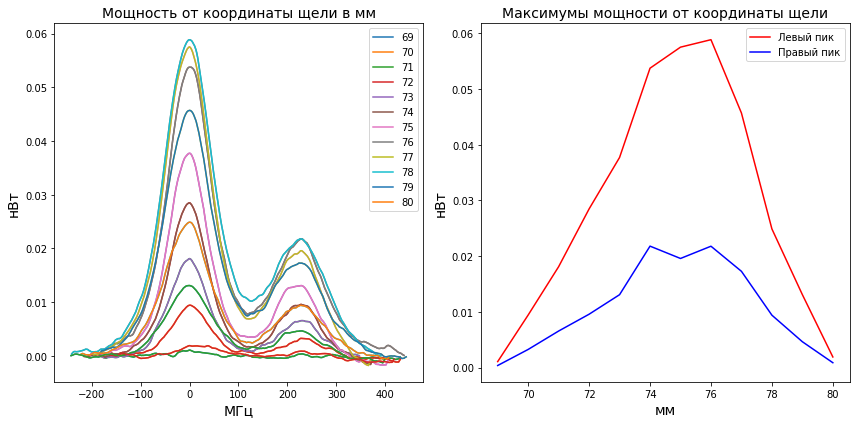

In [17]:
plt.figure(figsize=(12,6))


plt.subplot(121)
for n in range(69, 81):
    plt.plot(X[n-69], Y[n-69], label=n)
    
plt.legend()
plt.xlabel("МГц", fontsize=fontsize)
plt.ylabel("нВт", fontsize=fontsize)

plt.title("Мощность от координаты щели в мм", fontsize=fontsize)



plt.subplot(122)
max1, max2 = [], []

cord = np.arange(69, 81)

for i1, i2, i in zip(I1, I2, range(len(I1))):
    max1.append(Y[i][i1])
    max2.append(Y[i][i2])

plt.plot(cord, max1, label="Левый пик", color="red")
plt.plot(cord, max2, label="Правый пик", color="blue")

plt.legend()
plt.xlabel("мм", fontsize=fontsize)
plt.ylabel("нВт", fontsize=fontsize)

plt.title("Максимумы мощности от координаты щели", fontsize=fontsize)


plt.subplot(121)
for n in range(69, 81):
    plt.plot(X[n-69], Y[n-69], label=n)
    
    
print(np.array(max1).sum())

# for n in range(69, 81):
#     print(np.trapz(Y[n-69], X[n-69]))

plt.tight_layout()

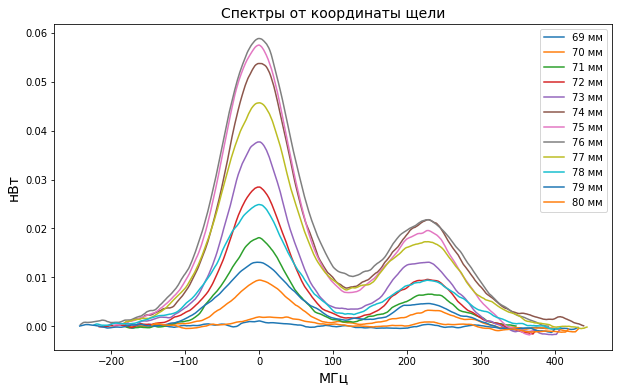

In [22]:
plt.figure(figsize=(10, 6))

for n in range(69, 81):
    plt.plot(X[n-69], Y[n-69], label="{} мм".format(n))
    
plt.legend()
plt.xlabel("МГц", fontsize=fontsize)
plt.ylabel("нВт", fontsize=fontsize)

plt.title("Спектры от координаты щели", fontsize=fontsize)

plt.savefig("/Users/goloshch/Desktop/RQC_AtomicBeam/Report/images/mnogo.pdf")

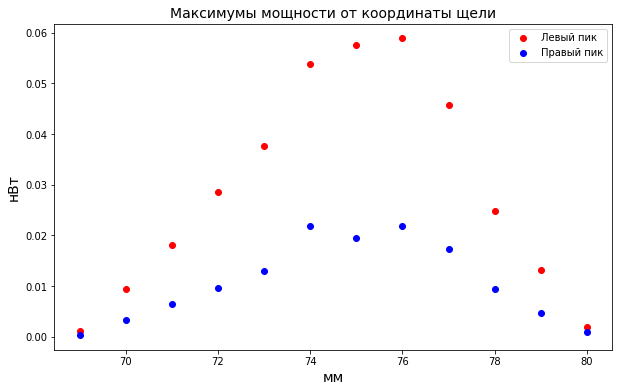

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(cord, max1, label="Левый пик", color="red")
plt.scatter(cord, max2, label="Правый пик", color="blue")

plt.legend()
plt.xlabel("мм", fontsize=fontsize)
plt.ylabel("нВт", fontsize=fontsize)

plt.title("Максимумы мощности от координаты щели", fontsize=fontsize)
plt.savefig("/Users/goloshch/Desktop/RQC_AtomicBeam/Report/images/mnogopikov.pdf")

In [20]:
coef = 2 / (6.6  * 446.8 * 0.0015) * 1e13
coef

4521490645035.8545

In [21]:
plt.plo

AttributeError: module 'matplotlib.pyplot' has no attribute 'plo'

In [ ]:
A1, S1, A2, S2, G1, G2 = [], [], [], [], [], []

for n in range(70, 80):
    x, y = X[n - 69], Y[n - 69]
    a1, s1, g1, a2, s2, g2 = bivoigt_fit(x, y)
    plt.title("MM{}.csv".format(n), fontsize=fontsize)
    
    A1.append(a1)
    A2.append(a2)
    S1.append(s1)
    S2.append(s2)
    G1.append(g1)
    G2.append(g2)
    
A1 = np.array(A1)
A2 = np.array(A2)
S1 = np.array(S1)
S2 = np.array(S2)
G1 = abs(np.array(G1))
G2 = abs(np.array(G2))


results = pd.DataFrame({"S1, MHz" : S1, 
                        "S2, MHz" : S2, 
                        "s1" : (1000 / (2 * G1 * 27.2))**2 - 1, 
                        "s2" : (1000 / (2 * G2 * 27.2))**2 - 1, 
                        "G1" : G1, 
                        "G2" : G2})


results
# for n in range():
# print((1 / (2 * params[-1]) * 1000 / 27.2)**2 - 1)

In [ ]:
plt.figure(figsize=(12,6))


plt.subplot(121)
for n in range(69, 81):
    plt.plot(X[n-69], coef * Y[n-69], label=n)
    
plt.legend()
plt.xlabel("MHz", fontsize=fontsize)
plt.ylabel("atoms/sec", fontsize=fontsize)

plt.title("Intensity from coordinate of the slit", fontsize=fontsize)



plt.subplot(122)
max1, max2 = [], []

cord = np.arange(69, 81)

for i1, i2, i in zip(I1, I2, range(len(I1))):
    max1.append(coef*Y[i][i1])
    max2.append(coef*Y[i][i2])

plt.plot(cord, max1, label="left_max")
plt.plot(cord, max2, label="right_max")

plt.legend()
plt.xlabel("MHz", fontsize=fontsize)
plt.ylabel("atoms/sec", fontsize=fontsize)

plt.title("Maximums of intensity from coordinate of the slit", fontsize=fontsize)



plt.tight_layout()

In [ ]:
def voigt(x, a, s, g):
    return a * voigt_profile(x, s, g)


def bivoigt(x, a1, s1, g1, a2, s2, g2):
    return a1 * voigt_profile(x, s1, g) + a2 * voigt_profile(x - 228.2, s2, g)


def bivoigt_equal(x, a1, a2, s, g):
    return a1 * voigt_profile(x, s, g) + a2 * voigt_profile(x - 228.2, s, g)


def preprocess(x, y, left=0.2, right=0.2):
    plt.figure(figsize=(12, 4))
    plt.plot(x, y, color="blue")
    
    cut1 = round(len(x) * left)
    cut2 = round(len(x) * right)
    temp_x, temp_y = x[cut1:-cut2], y[cut1:-cut2]
    
    plt.plot(temp_x, temp_y, color="red")
    plt.tight_layout()
    return temp_x, temp_y


def process(x, y, left=0.2, right=0.2):
    plt.figure(figsize=(12, 4))
    plt.subplot(131) 
    plt.plot(x, y, color="blue")
    
    cut1 = round(len(x) * left)
    cut2 = round(len(x) * right)
    k1, b1 = np.polyfit(x[:cut1], y[:cut1], deg=1)
    k2, b2 = np.polyfit(x[-cut2:], y[-cut2:], deg=1)

    plt.subplot(132)
    plt.plot(x, y, color="blue")
    plt.plot(x, k1*x + b1, color="green")
    plt.plot(x, k2*x + b2, color="red")

    temp_x, temp_y = x[:], y[:]
    
    intercept = len(x[x < (b2 - b1) / (k1 - k2)])
    temp_y[:intercept] -= (k1 * x[:intercept] + b1)
    temp_y[intercept:] -= (k2 * x[intercept:] + b2)
    
    plt.subplot(133)

    idx1, idx2 = np.argmax(temp_y[:len(temp_x)//2]), np.argmax(temp_y[len(temp_x)//2:]) + len(temp_x)//2
    m1, m2 = temp_x[idx1], temp_x[idx2]

    temp_x = (temp_x - m1) * 228.2 / (m2 - m1)
    temp_y *= 5.7/20

    plt.scatter(temp_x, temp_y, color="red", s=10, alpha=0.2)
    
    kernel_size = 500
    kernel = np.ones(kernel_size) / kernel_size
    temp_y = np.convolve(temp_y, kernel, mode='same')

    plt.plot(temp_x, temp_y, color="blue")
    plt.xlabel("MHz")
    plt.ylabel("nW")
    
    plt.tight_layout()
    
    return temp_x, temp_y, idx1, idx2


def g_to_s(g):
    return (2 * 27.2 * 1e-3 * g)**2 - 1


def params_to_df(params, params_dif):
    a1, a2, s, g = params
    res1 = pd.DataFrame({"A1, nW" : [a1], "A2, nW" : [a2], 
                         "S, MHz" : s, "Gamma, MHz" : g, 
                         "Saturation" : g_to_s(g)})
    
    a1, a2, s1, s2, g1, g2 = params_dif
    res2 = pd.DataFrame({"A1, nW" : [a1], "A2, nW" : [a2], 
                         "S1, MHz" : s1, "S2, MHz" : s2,
                         "Gamma1, MHz" : g1, "Gamma2, MHz" : g2, 
                         "Saturation1" : g_to_s(g1), "Saturation2" : g_to_s(g2)})
    
    return res1, res2


def fit(x, y, idx1, idx2):
    p1, p2 = curve_fit(voigt, x[:idx1] ,y[:idx1])[0], curve_fit(voigt, x[idx2:]-228.2, y[idx2:])[0]
    a1, s1, g1, a2, s2, g2 = *p1, *p2
    s = (s1 + s2) / 2
    g = (g1 + g2) / 2

    params = curve_fit(bivoigt_equal, x, y, [a1, a2, s, g])[0]

    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.scatter(x, y, alpha=0.1, s=1, color="black")
    plt.plot(x, voigt(x, *p1) + voigt(x-228.2, *p2), color="blue", label="sum")
    plt.xlabel("MHz")
    plt.ylabel("nW")
    plt.legend()
    
    plt.subplot(122)
    plt.scatter(x, y, alpha=0.1, s=1, color="black")
    plt.plot(x, bivoigt_equal(x, *params), color="red", label="equal")
    plt.legend()
    plt.xlabel("MHz")
    plt.ylabel("nW")
    
    plt.tight_layout()
    
    return params, [a1, a2, s1, s2, g1, g2]

In [ ]:
from src.main import fit, params_to_df

params, params_dif = fit(x, y, idx1, idx2)

df1, df2 = params_to_df(params, params_dif)

display(df1)
display(df2)

In [ ]:
from src.main import process, preprocess

data = pd.read_csv("data/new_data/MM72.CSV")
x, y = np.array(data.iloc[::, 0]), np.array(data.iloc[::, 3])

x, y = preprocess(x, y, 0.1, 0.3)

In [ ]:
x, y, idx1, idx2 = process(x, y)

In [ ]:
0.0007 / (50 * 6.6 * 10**(-34 + 12) * 447) / 10**13